[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/Visualization3d.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/Visualization3d.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

# Visualization in 3D

An `Axes3D` object is created just like any other axes using the `projection=‘3d’` keyword. Create a new `matplotlib.figure.Figure` and add a new axes to it of type `Axes3D`:

matplotlib version: 3.5.0


<IPython.core.display.Javascript object>


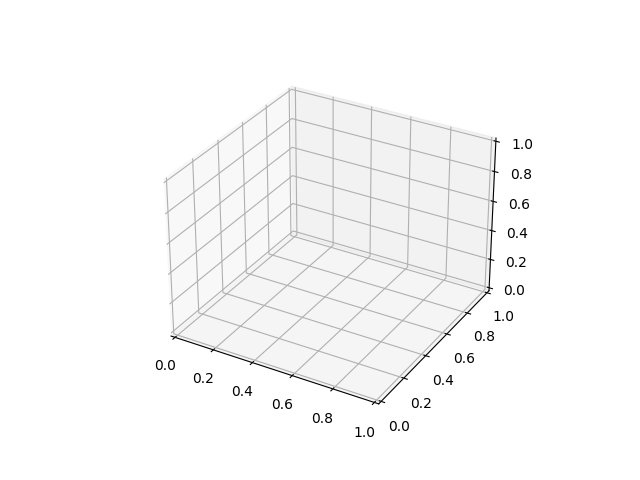

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib import cm
from matplotlib.ticker import LinearLocator
%matplotlib notebook
print(f'matplotlib version: {mpl.__version__}')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## Line plots

This example demonstrates plotting a parametric curve in 3D.

<IPython.core.display.Javascript object>


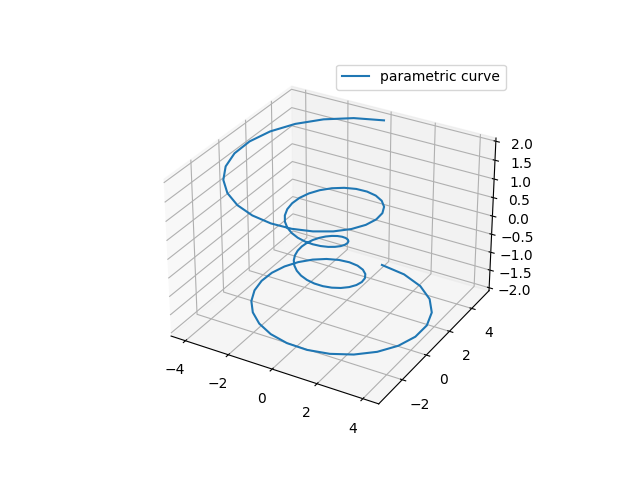

In [2]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend();

## Scatter plots

Demonstration of a basic scatterplot in 3D.

<IPython.core.display.Javascript object>


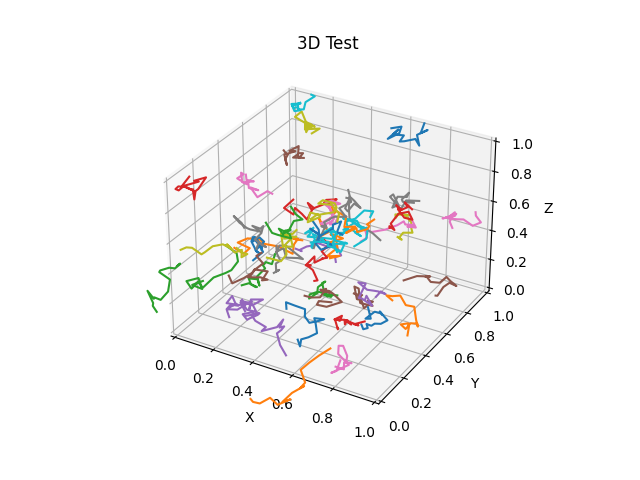

In [3]:
def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)


<IPython.core.display.Javascript object>


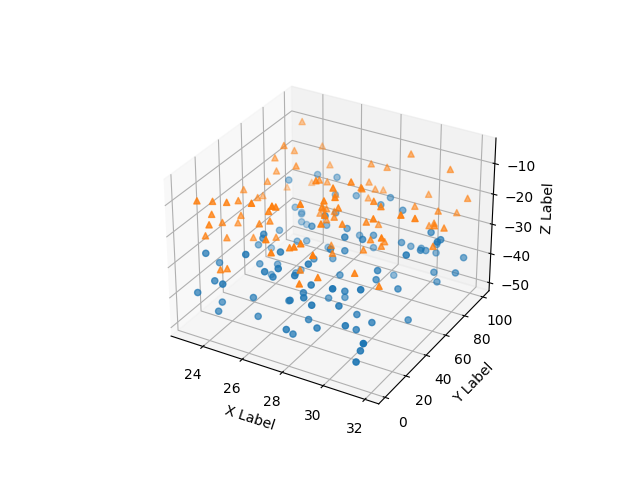

In [4]:
def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m);

ax.set_xlabel('X Label');
ax.set_ylabel('Y Label');
ax.set_zlabel('Z Label');

## Mesh (wireframe)

`Axes3D.plot_wireframe(X, Y, Z, *args, **kwargs)`

The rstride and cstride kwargs set the stride used to sample the input data to generate the graph. If either is 0 the input data in not sampled along this direction producing a 3D line plot rather than a wireframe plot. The stride arguments are only used by default if in the ‘classic’ mode. They are now superseded by rcount and ccount. Will raise ValueError if both stride and count are used.

The rcount and ccount kwargs supersedes `rstride` and
`cstride` for default sampling method for wireframe plotting. These arguments will determine at most how many evenly spaced samples will be taken from the input data to generate the graph. 

<IPython.core.display.Javascript object>


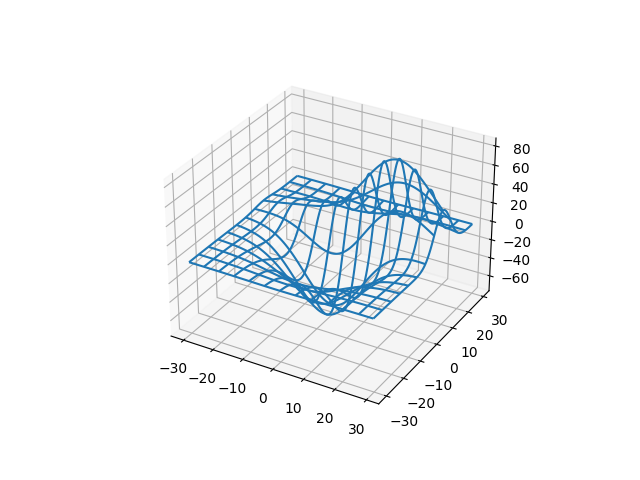

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

## Surface plots

`Axes3D.plot_surface(X, Y, Z, *args, **kwargs)`

By default it will be colored in shades of a solid color, but it also supports color mapping by supplying the cmap argument.

The rstride and cstride kwargs set the stride used to sample the input data to generate the graph. If 1k by 1k arrays are passed in, the default values for the strides will result in a 100x100 grid being plotted. Defaults to 10. Raises a ValueError if both stride and count kwargs (see next section) are provided.

The rcount and ccount kwargs supersedes rstride and cstride for default sampling method for surface plotting. These arguments will determine at most how many evenly spaced samples will be taken from the input data to generate the graph. This is the default sampling method unless using the ‘classic’ style. Will raise ValueError if both stride and count are specified. Added in v2.0.0.

<IPython.core.display.Javascript object>


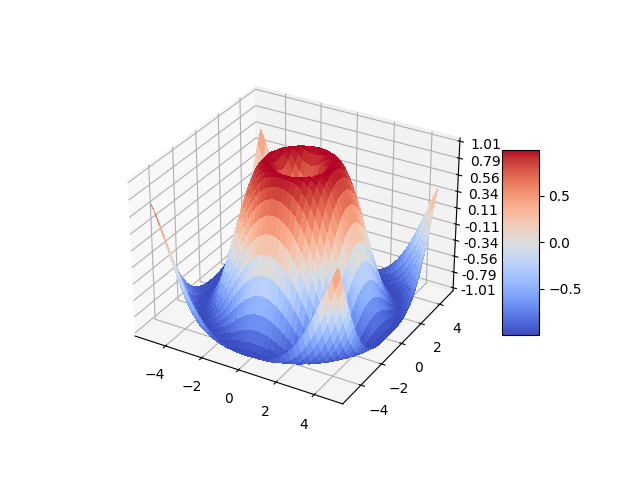

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

<IPython.core.display.Javascript object>


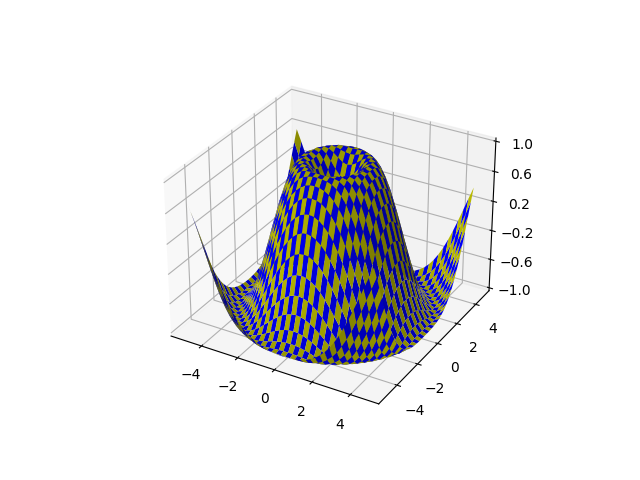

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))
